IMPORTACION DE LIBRERIAS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Configuracion de Gaficos

In [3]:
plt.style.use('default')
sns.set_palette("Set2")       # ✅ Colores modernos

Carga de Datos Limpios

In [4]:
jobs = pd.read_csv("../data/clean/jobs_clean.csv")
tecnicos = pd.read_csv("../data/clean/tecnicos_clean.csv")
habilidades = pd.read_csv("../data/clean/habilidades_clean.csv")

print("=== ANÁLISIS EXPLORATORIO DE DATOS ===\n")

=== ANÁLISIS EXPLORATORIO DE DATOS ===



Analisis de capacidad VS demanda

In [7]:
print("1. ANÁLISIS DE CAPACIDAD VS DEMANDA")
print("-" * 40)

total_demanda = jobs['duracion_horas'].sum()
total_capacidad = tecnicos['capacidad_diaria_h'].sum() * 7 


print(f"Demanda total: {total_demanda:.2f} horas")
print(f"Capacidad total: {total_capacidad:.2f} horas")
print(f"Porcentaje de utilización: {(total_demanda/total_capacidad)*100:.2f}%")

if total_demanda > total_capacidad:
    print("⚠️  ALERTA: Demanda excede capacidad")
else:
    print("✅ Capacidad suficiente para la demanda")

print("\n" + "="*50 + "\n")

1. ANÁLISIS DE CAPACIDAD VS DEMANDA
----------------------------------------
Demanda total: 92.00 horas
Capacidad total: 378.00 horas
Porcentaje de utilización: 24.34%
✅ Capacidad suficiente para la demanda




Aanalisis De Trabajo 


In [8]:
print("2. ANÁLISIS DE TRABAJOS")
print("-" * 40)

2. ANÁLISIS DE TRABAJOS
----------------------------------------


Descripcion de la estadistica

In [9]:
print("Estadísticas de duración:")
print(jobs['duracion_horas'].describe())

Estadísticas de duración:
count    30.000000
mean      3.066667
std       1.311312
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: duracion_horas, dtype: float64


Tiempos de ditribucion: GRafica

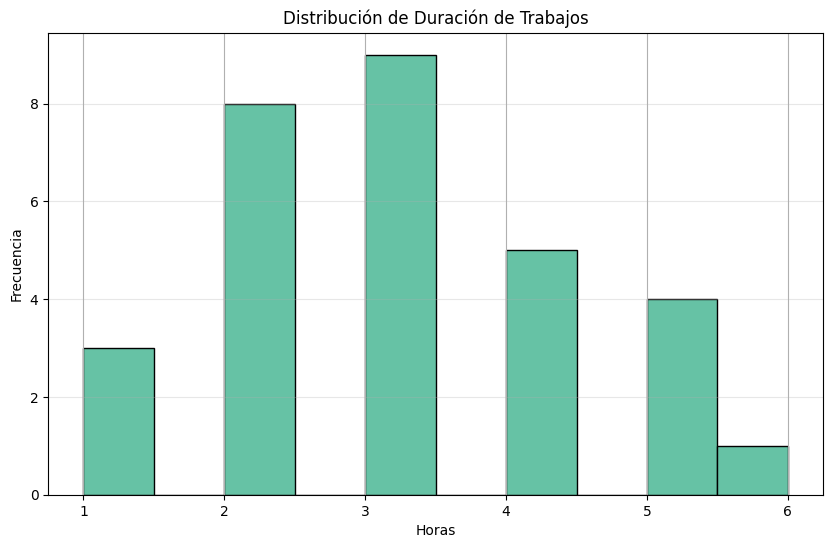

In [10]:
plt.figure(figsize=(10, 6))
jobs['duracion_horas'].hist(bins=10, edgecolor='black')
plt.title('Distribución de Duración de Trabajos')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.savefig('../results/duracion_trabajos_hist.png', dpi=300, bbox_inches='tight')
plt.show()

Distribucion por Habilidad de tecnicos en requerimientos

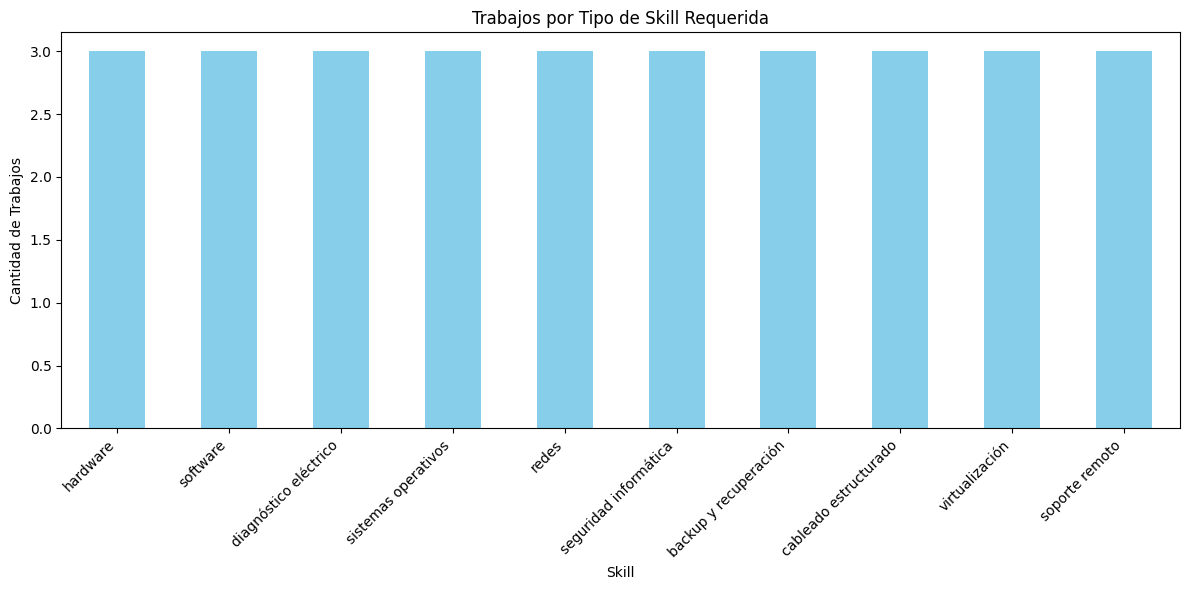


Trabajos por skill:
  hardware: 3 trabajos
  software: 3 trabajos
  diagnóstico eléctrico: 3 trabajos
  sistemas operativos: 3 trabajos
  redes: 3 trabajos
  seguridad informática: 3 trabajos
  backup y recuperación: 3 trabajos
  cableado estructurado: 3 trabajos
  virtualización: 3 trabajos
  soporte remoto: 3 trabajos




In [11]:
plt.figure(figsize=(12, 6))
skill_counts = jobs['skill_requerida'].value_counts()
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Trabajos por Tipo de Skill Requerida')
plt.xlabel('Skill')
plt.ylabel('Cantidad de Trabajos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../results/trabajos_por_skill.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTrabajos por skill:")
for skill, count in skill_counts.items():
    print(f"  {skill}: {count} trabajos")

print("\n" + "="*50 + "\n")

Analisis DE tecnicos


In [14]:
print("3. ANÁLISIS DE TÉCNICOS")
print("-" * 40)

print("Capacidad por técnico:")
for _, tech in tecnicos.iterrows():
    print(f"  {tech['Id_tecnico']} ({tech['nombre']}): {tech['capacidad_diaria_h']}h/día")

3. ANÁLISIS DE TÉCNICOS
----------------------------------------
Capacidad por técnico:
  T1 (Carlos Rodriguez): 8h/día
  T2 (Ana Gomez): 7h/día
  T3 (Luis Martinez): 8h/día
  T4 (Maria Hernandez): 8h/día
  T5 (Jorge Perez): 8h/día
  T6 (Sebastian Ospina): 15h/día


GRAFICO DE CAPACIDAD POR TECNICO

<Figure size 1000x600 with 0 Axes>

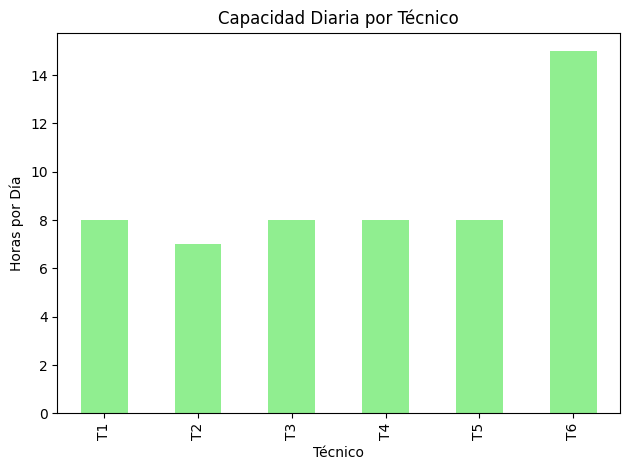

In [15]:
plt.figure(figsize=(10, 6))
tecnicos.plot(kind='bar', x='Id_tecnico', y='capacidad_diaria_h', 
              legend=False, color='lightgreen')
plt.title('Capacidad Diaria por Técnico')
plt.xlabel('Técnico')
plt.ylabel('Horas por Día')
plt.tight_layout()
plt.savefig('../results/capacidad_por_tecnico.png', dpi=300, bbox_inches='tight')
plt.show()

ANALISIS DE COMPATIBILIDAD

In [16]:
print("\n4. ANÁLISIS DE COMPATIBILIDAD")
print("-" * 40)


4. ANÁLISIS DE COMPATIBILIDAD
----------------------------------------


matriz de compatibilidad

In [17]:
compatibilidad_matrix = habilidades.pivot_table(
    index='id_job', columns='id_tecnico', values='compatible', fill_value=0
)

print("Matriz de compatibilidad (primeras 10 filas):")
print(compatibilidad_matrix.head(10))

Matriz de compatibilidad (primeras 10 filas):
id_tecnico   T1   T2   T3   T4   T5
id_job                             
J1          1.0  0.0  1.0  0.0  0.0
J10         0.0  1.0  0.0  0.0  1.0
J11         1.0  0.0  1.0  0.0  0.0
J12         1.0  0.0  0.0  0.0  1.0
J13         0.0  0.0  1.0  0.0  0.0
J14         1.0  0.0  0.0  1.0  0.0
J15         0.0  1.0  0.0  0.0  1.0
J16         0.0  1.0  0.0  0.0  0.0
J17         0.0  0.0  0.0  1.0  0.0
J18         0.0  0.0  1.0  0.0  0.0


Compatibilidad por tecnicos


In [20]:
compatibilidad_por_tecnico = habilidades.groupby('id_tecnico')['compatible'].sum()
print(f"\nTrabajos compatibles por técnico:")
print(compatibilidad_por_tecnico)



Trabajos compatibles por técnico:
id_tecnico
T1    9
T2    9
T3    9
T4    9
T5    9
Name: compatible, dtype: int64


ANALISIS DE FECHAS LIMITES



5. ANÁLISIS DE FECHAS LÍMITE
----------------------------------------
Distribución de días restantes para deadline:
count    30.000000
mean     10.000000
std       3.352817
min       4.000000
25%       7.250000
50%      10.000000
75%      12.750000
max      16.000000
Name: dias_restantes, dtype: float64


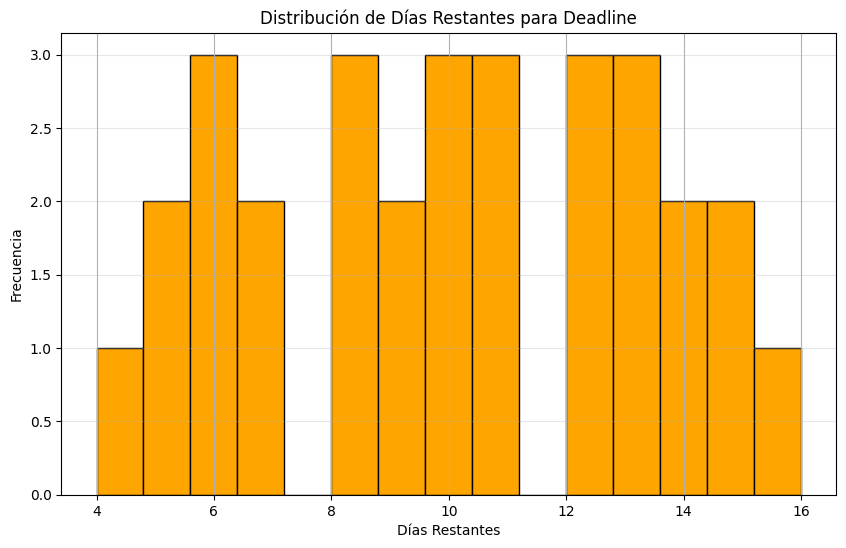

In [21]:
print("\n5. ANÁLISIS DE FECHAS LÍMITE")
print("-" * 40)

jobs['deadline'] = pd.to_datetime(jobs['deadline'])
jobs['dias_restantes'] = (jobs['deadline'] - pd.Timestamp.now().normalize()).dt.days

print("Distribución de días restantes para deadline:")
print(jobs['dias_restantes'].describe())

plt.figure(figsize=(10, 6))
jobs['dias_restantes'].hist(bins=15, edgecolor='black', color='orange')
plt.title('Distribución de Días Restantes para Deadline')
plt.xlabel('Días Restantes')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.savefig('../results/dias_restantes_hist.png', dpi=300, bbox_inches='tight')
plt.show()

GUARDADR RESUMEN ESTADISTICO

In [22]:
resumen_eda = {
    'total_trabajos': len(jobs),
    'total_tecnicos': len(tecnicos),
    'demanda_total_horas': total_demanda,
    'capacidad_total_horas': total_capacidad,
    'utilizacion_porcentaje': (total_demanda/total_capacidad)*100,
    'duracion_promedio': jobs['duracion_horas'].mean(),
    'duracion_maxima': jobs['duracion_horas'].max(),
    'dias_restantes_promedio': jobs['dias_restantes'].mean(),
    'trabajos_urgentes': len(jobs[jobs['dias_restantes'] <= 3])
}

resumen_df = pd.DataFrame(list(resumen_eda.items()), columns=['Metrica', 'Valor'])
resumen_df.to_csv('../results/eda_summary.csv', index=False)

print("Resumen guardado en results/eda_summary.csv")
print("\nResumen final:")
print(resumen_df)

print("\n✅ ANÁLISIS EDA COMPLETADO")

Resumen guardado en results/eda_summary.csv

Resumen final:
                   Metrica       Valor
0           total_trabajos   30.000000
1           total_tecnicos    6.000000
2      demanda_total_horas   92.000000
3    capacidad_total_horas  378.000000
4   utilizacion_porcentaje   24.338624
5        duracion_promedio    3.066667
6          duracion_maxima    6.000000
7  dias_restantes_promedio   10.000000
8        trabajos_urgentes    0.000000

✅ ANÁLISIS EDA COMPLETADO
